In [2]:
%matplotlib inline

import numpy as np
import h5py
import matplotlib
##matplotlib.use('Qt4Agg')
#matplotlib.use('TkAgg')
##%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import scipy
from scipy import optimize
#from scipy.interpolate import interp1d

#sys.path.insert(0, '../source/SwissFEL_BERNINA_20181820/src/')
#import analysis
#from analysis import *

In [94]:
# data from lab experiments (Mar-Oct 2020)
# Mar 2020
time1 = np.array([1.068999028, 1.554907677, 1.943634597, 2.429543246, 2.915451895, 3.401360544, 3.644314869, 3.887269193, 4.130223518, 4.373177843, 4.616132167, 4.859086492]) # ms
# counts
ntot1 = np.array([357, 183, 105, 158, 113, 471, 319, 406, 327, 454, 206, 220])
nmarbles1 = np.array([0, 0, 0, 0, 1, 9, 4, 4, 3, 36, 70, 39])
nblobs1 = np.array([0, 0, 0, 0, 1, 16, 23, 19, 17, 34, 50, 140])
nfract1 = np.array([0, 0, 0, 0, 0, 0, 0, 3, 1, 5, 6, 16])
ndist1 =  np.array([0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 2, 7])
# fractions
fice1 = (nmarbles1 + nblobs1 + nfract1 + ndist1)/ntot1.astype(np.float)
fmarbles1 = nmarbles1/ntot1.astype(np.float)
fblobs1 = nblobs1/ntot1.astype(np.float)
ffract1 = nfract1/ntot1.astype(np.float)
fdist1 = ndist1/ntot1.astype(np.float)
# nucleation rate
V = 5.24E-18 # m^3*s/ms
J1 = -np.gradient(np.log(1-fice1), time1)/V

# Nov 2020
time2 = np.array([1.140684411,1.520912548,1.901140684,2.281368821,2.661596958,3.041825095,3.422053232,3.802281369])
# counts
ntot2 = np.array([48,39,34,210,715,881,797,292])
nmarbles2 = np.array([0,1,0,5,12,13,31,21])
nblobs2 = np.array([0,0,0,6,12,14,62,22])
nfract2 = np.array([0,0,0,0,0,2,0,0])
ndist2 = np.array([0,0,0,2,3,6,13,6])
# fractions
fice2 = (nmarbles2 + nblobs2 + nfract2 + ndist2)/ntot2.astype(np.float)
fmarbles2 = nmarbles2/ntot2.astype(np.float)
fblobs2 = nblobs2/ntot2.astype(np.float)
ffract2 = nfract2/ntot2.astype(np.float)
fdist2 = ndist2/ntot2.astype(np.float)
# nucleation rate
J2 = -np.gradient(np.log(1-fice2), time2)/V

# total
time = [time1, time2]
fice = [fice1, fice2]
fmarbles = [fmarbles1, fmarbles2]
fblobs = [fblobs1, fblobs2]
ffractdist = [ffract1+fdist1, ffract2+fdist2]
J = [J1, J2]

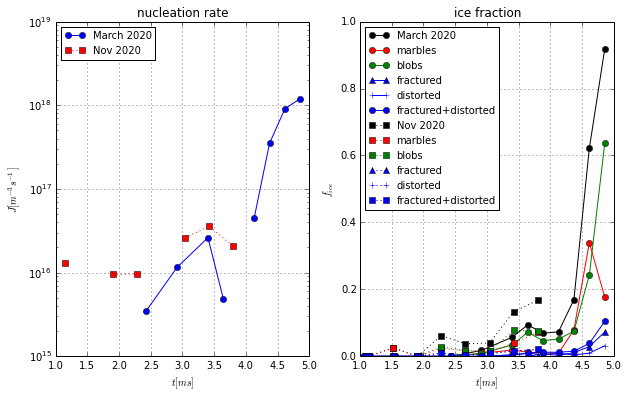

In [114]:
# plot r1 and g1
f, axes = plt.subplots(nrows=1, ncols=2,  figsize=(10, 6))

#axes[0].plot(time, J, 'bo:', label='March 2020')
axes[0].semilogy(time[0], J[0], 'bo-', label='March 2020')
axes[0].semilogy(time[1], J[1], 'rs:', label='Nov 2020')
axes[0].legend(loc='upper left', prop={'size': 10})
axes[0].set_xlabel('$t [ms]$')
axes[0].set_ylabel('$J [m^{-3}s^{-1}]$')
axes[0].set_title('nucleation rate')
#axes[0].set_xlim(170,310)
#axes[0].set_ylim(0.274,0.279)
axes[0].grid(linestyle='dotted')

axes[1].set_title('ice fraction')
axes[1].plot(time1, fice1, 'ko-', label='March 2020')
axes[1].plot(time1, fmarbles1, 'ro-', label='marbles')
axes[1].plot(time1, fblobs1, 'go-', label='blobs')
axes[1].plot(time1, ffract1, 'b^-', label='fractured')
axes[1].plot(time1, fdist1, 'b+-', label='distorted')
axes[1].plot(time1, (ffract1+fdist1), 'bo-', label='fractured+distorted')
axes[1].plot(time2, fice2, 'ks:', label='Nov 2020')
axes[1].plot(time2, fmarbles2, 'rs:', label='marbles')
axes[1].plot(time2, fblobs2, 'gs:', label='blobs')
axes[1].plot(time2, ffract2, 'b^:', label='fractured')
axes[1].plot(time2, fdist2, 'b+:', label='distorted')
axes[1].plot(time2, (ffract2+fdist2), 'bs:', label='fractured+distorted')
axes[1].legend(loc='upper left', prop={'size': 10})
axes[1].set_xlabel('$t [ms]$')
axes[1].set_ylabel('$f_{ice}$')
#axes[1].set_ylabel('number of droplets')
#axes[1].set_xlim(170,310)
#axes[1].set_ylim(0.274,0.279)
axes[1].grid(linestyle='dotted')

plt.savefig('reaction_rates-fig1.eps', format='eps')
plt.show()

In [117]:
# Gaussian peak fitting functions
#fitfunc = lambda p, x: p[0]*np.exp(-(x-p[1])**2/(2*p[2]**2))
#errfunc = lambda p, x, y: fitfunc(p, x) - y

"""
def reactions(k, marbles, blobs, fractured):
    dmdt = -(k[0] + k[2])*np.array(marbles)
    dbdt = k[0]*np.array(marbles) - k[1]*np.array(blobs)
    dcdt = k[2]*np.array(marbles) + k[1]*np.array(blobs)
    return np.array([dmdt, dbdt, dcdt])
    
errfunc = lambda k, t, marbles, blobs, fractured: (reactions(k, marbles, blobs, fractured) - np.array([np.gradient(marbles, t), np.gradient(blobs, t), np.gradient(fractured, t)])).flatten()

# reaction rates
k0 = [0.6, 0.5, 0.4] # initial guess
[k1, success] = optimize.leastsq(errfunc, k0[:], args=(time, nmarbles, nblobs, nfract+ndist))

if success:
    print 'March 2020 - all data - raw counts'
    print k1

[k1, success] = optimize.leastsq(errfunc, k0[:], args=(time[-3:], nmarbles[-3:], nblobs[-3:], nfract[-3:]+ndist[-3:]))

if success:
    print 'March 2020 - last 3 data points (>10% ice) - raw counts'
    print k1

[k1, success] = optimize.leastsq(errfunc, k0[:], args=(time[-3:], fmarbles[-3:], fblobs[-3:], ffract[-3:]+fdist[-3:]))

if success:
    print 'March 2020 - last 3 data points (>10% ice) - normalized'
    print k1
"""

def reactions(k, marbles, blobs, fractured, J, water):
    dmdt = J*np.array(water) - (k[0] + k[2])*np.array(marbles)
    dbdt = k[0]*np.array(marbles) - k[1]*np.array(blobs)
    dcdt = k[2]*np.array(marbles) + k[1]*np.array(blobs)
    return np.array([dmdt, dbdt, dcdt])
    
#errfunc = lambda k, t, marbles, blobs, fractured, J, water: (reactions(k, marbles, blobs, fractured, J, water) - np.array([np.gradient(marbles, t), np.gradient(blobs, t), np.gradient(fractured, t)])).flatten()
def errfunc(k, t, marbles, blobs, fractured, J, water):
    #if len(t.shape) > 1:
    if isinstance(t[0], np.ndarray):
        #return (np.hstack([reactions(k, marbles[j], blobs[j], fractured[j], J[j], water[j]) for j in range(len(t))]) - np.hstack([[np.gradient(marbles[j], t[j]), np.gradient(blobs[j], t[j]), np.gradient(fractured[j], t[j])] for j in range(len(t))])))
        return 0
    else:
        return (reactions(k, marbles, blobs, fractured, J, water) - np.array([np.gradient(marbles, t), np.gradient(blobs, t), np.gradient(fractured, t)])).flatten()


# reaction rates
k0 = [0.6/V, 0.5/V, 0.4/V] # initial guess
[k1, success] = optimize.leastsq(errfunc, k0[:], args=(time1, fmarbles1, fblobs1, ffract1+fdist1, J1, (1-fice1)))

if success:
    print 'March 2020 - all data'
    print k1*V, 'fraction rate per droplet per ms'
    print 'residuals per data point:', np.mean(errfunc(k1, time1, fmarbles1, fblobs1, ffract1+fdist1, J1, (1-fice1))**2)*V*V
    
[k1, success] = optimize.leastsq(errfunc, k0[:], args=(time1[-3:], fmarbles1[-3:], fblobs1[-3:], ffract1[-3:]+fdist1[-3:], J1[-3:], (1-fice1)[-3:]))

if success:
    print 'March 2020 - last 3 data points (>10% ice)'
    print k1*V, 'fraction rate per droplet per ms'
    print 'residuals per data point:', np.mean(errfunc(k1, time1, fmarbles1, fblobs1, ffract1+fdist1, J1, (1-fice1))**2)*V*V

'''
[k1, success] = optimize.leastsq(errfunc, k0[:], args=(time, fmarbles, fblobs, ffractdist, J, (1-fice)))

if success:
    print 'March+Nov 2020 - all data'
    print k1*V, 'fraction rate per droplet per ms'
    print 'residuals per data point:', np.mean(errfunc(k1, time, fmarbles, fblobs, ffractdist, J, (1-fice))**2)*V*V
'''

March 2020 - all data
[  1.79963804e+00  -1.63026544e-08   1.79963819e+00] fraction rate per droplet per ms
residuals per data point: 0.0818078891743
March 2020 - last 3 data points (>10% ice)
[  1.79823325e+00  -1.47356172e-08   1.79823339e+00] fraction rate per droplet per ms
residuals per data point: 0.0818079398124


"\n[k1, success] = optimize.leastsq(errfunc, k0[:], args=(time, fmarbles, fblobs, ffractdist, J, (1-fice)))\n\nif success:\n    print 'March+Nov 2020 - all data'\n    print k1*V, 'fraction rate per droplet per ms'\n    print 'residuals per data point:', np.mean(errfunc(k1, time, fmarbles, fblobs, ffractdist, J, (1-fice))**2)*V*V\n"

In [92]:
errfunc(k0, time, fmarbles, fblobs, ffract+fdist, J, 1-fice)

array([ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         3.50677258e+15,   9.69862688e+15,   2.10479124e+16,
         2.02815027e+15,  -1.01211370e+16,   3.98793855e+16,
         2.76740047e+17,   2.79773701e+17,   6.46333871e+16,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -9.10619469e-03,   1.68884686e+14,  -1.05346753e+15,
        -5.44401637e+15,  -3.33734441e+15,  -3.91017111e+15,
         1.93361805e+15,   1.57489068e+16,  -4.04233171e+16,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.51996217e+15,   4.70008590e+15,
         7.83699060e+15,   5.21753845e+15,   5.66099400e+15,
         1.31990450e+16,   4.90995331e+16,   7.42539903e+16])

In [52]:
errfunc(k1, time[-3:], fmarbles[-3:], fblobs[-3:], ffract[-3:]+fdist[-3:])

array([-1.20731269, -0.78037483,  0.36706591, -0.48712217, -0.3455228 ,
       -0.78862716, -0.1649916 , -0.4146765 , -0.80016055])

In [46]:
ice_fraction[-3:]

array([ 0.16960352,  0.62135922,  0.91818182])

In [69]:
k0

[3.1439999999999996e-18, 2.62e-18, 2.0960000000000002e-18]

In [70]:
k1

array([  3.14400000e-18,   2.62000000e-18,   2.09600000e-18])

In [71]:
J

array([ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         3.50677258e+15,   1.15926534e+16,   2.61962252e+16,
         4.88006476e+15,  -8.85138315e+15,   4.49276507e+16,
         3.51485969e+17,   9.10155910e+17,   1.20344962e+18])

In [83]:
len(fmarbles.shape)

1

In [88]:
time

array([ 1.06899903,  1.55490768,  1.9436346 ,  2.42954325,  2.91545189,
        3.40136054,  3.64431487,  3.88726919,  4.13022352,  4.37317784,
        4.61613217,  4.85908649])

In [89]:
time.shape

(12,)

In [110]:
isinstance(time[0][0], np.ndarray)

False

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()